In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [27]:
df = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /Job Simulation Projects Forage/BCGX Project/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [28]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [32]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

model.fit(X_train,y_train) # Complete this method call!

RandomForestClassifier(random_state=42)

In [33]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.9038882803943045
Precision: 0.8260869565217391
Recall: 0.05191256830601093
F1 Score: 0.09768637532133675
Confusion Matrix:
[[3282    4]
 [ 347   19]]


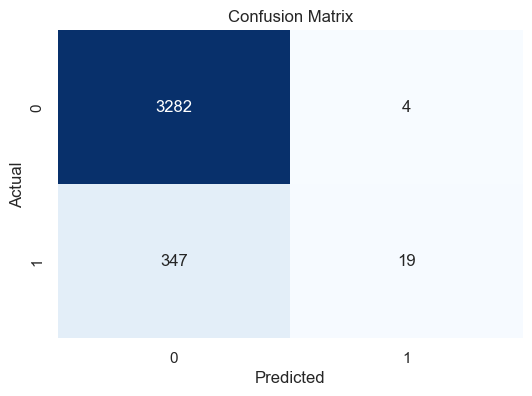

In [35]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### What the Confusion Matrix Tells You:

1. **Predictions That Were Correct:**
   - **True Negatives (Top-left, 3282 customers)**:
     - **What happened?**: The model predicted that these 3,282 customers would stay, and they actually did stay.
     - **Why it’s good**: The model got it right, helping you understand which customers are likely to stay.

   - **True Positives (Bottom-right, 19 customers)**:
     - **What happened?**: The model predicted that these 19 customers would leave, and they actually did leave.
     - **Why it’s good**: The model correctly identified customers who were at risk of leaving, giving you a chance to take action (e.g., offering them incentives to stay).

2. **Predictions That Were Wrong:**
   - **False Positives (Top-right, 4 customers)**:
     - **What happened?**: The model predicted that these 4 customers would leave, but they actually stayed.
     - **Why it’s not too bad**: While it’s a mistake, it’s less harmful. You might have wasted some resources trying to retain these customers when they were already likely to stay.

   - **False Negatives (Bottom-left, 347 customers)**:
     - **What happened?**: The model predicted that these 347 customers would stay, but they actually left.
     - **Why it’s concerning**: This is a bigger problem. The model missed the mark here, failing to warn you about customers who were at risk of leaving. These missed predictions mean you lost customers without realizing they were at risk.

### How Well Did the Model Do?

- **Accuracy (90.39%)**:
  - **What it means**: The model correctly predicted whether customers would stay or leave about 9 out of 10 times. At first glance, this seems pretty good.
  - **The catch**: Accuracy can be misleading. If most of your customers stay and only a few leave, the model could be right most of the time just by predicting that everyone will stay. That’s why we need to look deeper.

- **Precision (82.61%)**:
  - **What it means**: When the model says a customer will leave, it’s correct about 83% of the time. So, if the model flags someone as likely to churn, there’s a good chance they really are at risk.

- **Recall (5.19%)**:
  - **What it means**: This is where the model struggles. It only correctly identifies about 5% of the customers who actually leave. In other words, it misses a lot of people who are going to churn.

- **F1 Score (9.74%)**:
  - **What it means**: This is a combined measure of precision and recall. It’s low, indicating that the model’s overall ability to predict churn is weak, especially given how many actual churners it misses.

### What You Should Do:

- **Worry About the Misses**: The model is missing a lot of customers who end up leaving (those 347 False Negatives). This is a big red flag because it means you’re not getting a heads-up on most of the people who might churn.

- **Try to Improve**: You might need to adjust the model or the way you handle the data to catch more of those at-risk customers. Maybe the data is imbalanced (too many stayers compared to leavers), or maybe the model isn’t the best fit for the job.

### Bottom Line:
The model is doing okay in some ways—it’s pretty good at predicting when people will stay—but it’s not catching many of the customers who actually leave. That’s a problem because those are the customers you most need to identify to prevent churn. To improve, you’ll need to focus on catching more of those potential churners.